# 2) 
En el paper de Barabasi, comparan dos mecanismos de generación de redes aleatorias no dirigidas para explicar las distribuciones tipo power law observadas en muchos tipos de redes muy diversos.
## a)
Armamos un código para generar una red aleatoria tipo Erdos Renyi, con n cantidad de nodos
y aproximadamente m cantidad de enlaces. Este tipo de red consiste en simplemente tomar
n nodos y enlazar cada par con una probabilidad p.
### i.
Armamos una red de $n = 10000$ nodos y muestre que cumpla $m \cong  pn(n − 1)/2$



<ins>Aclaracion:</ins> Para optimizar los tiempos de ejecucion de las funciones voy a armar una que exclusivamente devuelva m (cantidad de enlaces) y otra que devuelva edges (vector de enlaces). La construccion es la misma pero sirven propositos distintos. Para el caso i. interesa unicamente el valor de m en funcion de valores de p. Y para el caso ii. interesa armar la red para un unico valor de p.

In [2]:
import networkx as nx
import random as random
import numpy as np
import matplotlib.pyplot as plt

#Inicialmente creo una funcion que devuelva m en funcion de n y p (p es un vector)
def ErdosRenyi_m(n,p_vect):
    m=0
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample < p:
                m+=1
    return(m)

#Creo una funcion que devuelve el listado de edges en funcion de n y p
def ErdosRenyi_edges(n,p):
    edges=[]
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample < p:
                edges.append((i,j))
    return(edges)

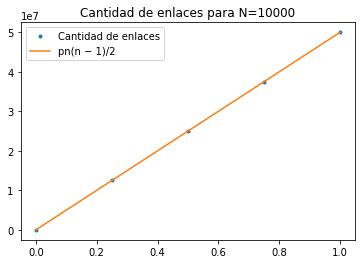

In [16]:
# Tarda aprox 40s en correr
n=10000 #cantidad de nodos
p_vect=np.linspace(0,1,5) # probabilidad de enlazar
m=[]
for p in p_vect:
    m.append(ErdosRenyi_m(n,p))
    
plt.plot(p_vect,m,'.',label = 'Cantidad de enlaces')
m_teorico=p_vect*n*(n - 1)/2
plt.plot(p_vect,m_teorico,label='pn(n − 1)/2')
plt.title(f'Cantidad de enlaces para N={n}')
plt.legend()
plt.show()

Es evidente del grafico que la relacion $m \cong  pn(n − 1)/2$ se cumple, esto se debe a que la cantidad de enlaces m, si la probabilidad fuera 1, seria el número de combinaciones sin repetición de 2 elementos elegidos entre los n. Usando la formula de combinatoria esto termina siendo $n(n-1)/2$. Si luego en cada iteracion agregamos que $p<1$, el valor mas probable termina siendo $pn(n-1)/2$.



### ii. Con la misma red, muestre que cumpla 〈ki〉 = p(n − 1). ¿Por qué vale esta relación?


Tomamos de ejemplo la red con $p=0.1$ y utilizamos la funcion ErdosRenyi_edges(n,p) armada anteriormente. Usamos un valor de p bajo para que la cantidad de enlaces agregar sea de un orden menor.

In [3]:
#Tarda aprox 8s
n=10000 #cantidad de nodos
p=0.1
edges=ErdosRenyi_edges(n,p)

In [4]:
#Tarda aprox 7s
#Genera la red con los nodos, sin conectar
Red_ErdosRenyi = nx.empty_graph(n) 
Red_ErdosRenyi.add_edges_from(edges)

In [40]:
#Calcula el grado medio
k_sum=0
for node in Red_ErdosRenyi.nodes():
    k_sum+=Red_ErdosRenyi.degree(node)
k_mean=k_sum/n

print(f"〈ki〉= {k_mean} \n p(n-1)= {p*(n - 1)}")

〈ki〉= 1000.086 
 p(n-1)= 999.9000000000001


Podemos ver que en la red del ejemplo la relacion se cumple. Esto se debe a que el grado medio se puede redefinir de la siguiente manera:
$$ \left \langle ki \right \rangle = \sum_{i}^{N} \frac{ki}{N} = \sum_{i,j}^{N} \frac{A_{ij}}{2N} = \frac{pn(n-1)/2}{2n} = p(n-1) $$
Donde $A_{ij}$ es la matriz de adyacencia, y el factor 2N se agrega debido a que al iterar sobre i y j, se recorre cada enlace dos veces (debido a que la matriz es simetrica).

In [ ]:
#Defino una funcion para generar una red de tipo erdos renyi en base a n y m
#Tarda aproximadamente 16 s para una red de n=10000 y p=0.1
def Red_ErdosRenyi(n,m):
    p=m/( n*(n-1)/2 )
    ErdosRenyi_edges(n,p)
    #Genera la red con los nodos, sin conectar
    Red = nx.empty_graph(n) 
    Red.add_edges_from(edges)
    return(Red)

## b) 
Armamos un código para generar una red aleatoria, con n cantidad de nodos y un grado inicial k0 fijo e igual para cada nodo.
Este tipo de red consiste en comenzar con k0 nodos de grado k0 e ir agregando un nodo de grado k0 en cada paso. Los nodos ya agregados irán aumentando su grado al conectarse con los nodos nuevos que se vayan agregando. La manera de conectar un nodo nuevo a los existentes es aleatoria, donde el enlace entre el nuevo nodo y uno existente ocurre con igual propabilidad para todos los nodos existentes. Es decir, la probabilidad de que el nodo nuevo se enlace a uno existente (i) es: P = 1/N. Donde N son todos los nodos existentes en ese paso.

In [99]:
def Aleatoria_n_k0(n,k0):
    #Comienza con k0 nodos de grado k0
    Red = nx.complete_graph(k0)
    for paso in range(k0,n):
        nodos_a_enlazar=random.sample(Red.nodes(), k0)
        enlaces_nuevos=[]
        for nodo in nodos_a_enlazar:
            enlaces_nuevos.append((nodo,paso))
        Red.add_edges_from(enlaces_nuevos)
    return(Red)

In [101]:
k0=10
n=10000
Red_aleatoria=Aleatoria(n,k0)

45


Para este tipo de red, la cantidad de enlaces corresponde a la suma de los enlaces de la red completa inicial mas la suma de los k0 enlaces agregados uno por uno: 
$$ m= k_0(k_0-1)/2 + (n-k_0)k_0 $$

De esta manera de obtiene la siguiente formula para la relacion entre $k_0$ n y m:
$$0 =- \frac{1}{2} k_0^{2} + \left (  n-\frac{1}{2}\right ) k_0 - m$$

Con lo cual los $k_0$ que generan una red de n nodos y ~m enlaces son el entero positivo mas cercano a las raices reales y positivas de esa ecuacion. 

In [102]:
#Por ejemplo tomamos n=100, m=1000
n=1000
m=89000
c=[-0.5 , n-0.5 , -m]
k0=[round(x) for x in np.roots(c) if np.isreal(x) and x > 0][0]
m_obtenido=k0*(k0-1)/2 + (n-k0)*k0
print(f"Para n={n}, m={m}, el k0 obtenido con este metodo es {k0} y genera {m_obtenido} enlaces.")

Para n=1000, m=89000, el k0 obtenido con este metodo es 1906.0 y genera 88629.0 enlaces.


In [103]:
def Red_aleatoria(n,m):
    c=[-0.5 , n-0.5 , -m]
    k0=[round(x) for x in np.roots(c) if np.isreal(x) and x > 0][0]
    #En caso que devuelva k0=0, lo redefino como 1
    if k0==0: k0=1
    Red=Aleatoria_n_k0(n,k0)
    return(Red)  

## c) 
Armamos un código para generar una red aleatoria tipo Barabasi, con $n$ cantidad de nodos y un grado inicial $k_0$ fijo e igual para cada nodo. 
Este tipo de red consiste en comenzar con pocos nodos de grado $k_0$ e ir agregando un nodo de grado $k_0$ en cada paso. Los nodos ya agregados irán aumentando su grado al conectarse con los nodos nuevos que se vayan agregando. La manera de conectar un nodo nuevo a los existentes es aleatoria, determinada por una probabilidad proporcional al grado de cada nodo existente. Es decir, la probabilidad de que el nodo nuevo se enlace a uno existente (i) es: $P = \frac{k_i}{\sum{j}k_j}$. Donde la sumatoria es sobre todos los nodos existentes. Para lo mismo, utilizamos una función de Numpy.Random.choice que elije de una lista con una dada probabilidad para cada elemento. 


In [65]:
import numpy as np
def barabasi(k_0, final_nodes):
    #m es el grado de los nodos iniciales y a la vez la cantidad de enlaces que agrego por iteracion
    
    new_node = k_0
        
    G = nx.complete_graph(k_0) #primero un grafo completo
    G_dict = {key: k_0-1 for key in range(k_0)} #usamos un dict para no recorrer siempre la red 
    
    for step in range(final_nodes - k_0):
        nodes_to_add = add_edges(G_dict, k_0)      
        G.add_node(new_node)
        G_dict[new_node] = k_0
        
        for node in nodes_to_add:
            G.add_edge(new_node, node)
            G_dict[node] += 1
                    
        new_node += 1
        
    return G

        
def add_edges(G_dict, k_0):
    nodes_probs = []
    nodes = list(G_dict.keys())
    total_degree = sum(G_dict.values())
    
    for node in nodes:
        node_degr = G_dict[node]
        node_prob = node_degr / total_degree #probabilidad definida en el enunciado, puede elegir dos veces el mismo
        nodes_probs.append(node_prob)
        
    random_nodes = np.random.choice(nodes, size = k_0, p = nodes_probs, replace = False)
             
    return random_nodes

Armamos redes con $n = 10000$ y comprobamos que cumple la relación: $ enlaces \cong k_0 n$
Para lo mismo generamos 10 redes con $k_0$ aleatorios dentro de un rango (la idea de estos grafos es empezar con número 'pequeño' de nodos). En este caso el rango era de $0$ a $50$ que es, a lo sumo, un $0.5 \%$ del total de nodos $n$.

Creamos un diccionario que para cada red nos guarda su $k_0$, la diferencia entre los enlaces y el valor teórico y el porcentaje que eso representa del total. 

In [12]:
import networkx as nx
m_dict = {}
n = 10000
times = 10

for _ in range(times):
    k_0 = np.random.randint(0,50)
    Network = barabasi(k_0, n)
    num_edges = Network.number_of_edges()
    diff = abs(num_edges - k_0 * n)
    diff_percent = diff / num_edges * 100
    m_dict[k_0] = num_edges , diff, diff_percent

print(m_dict)

{31: (309504, 496, 0.16025641025641024), 47: (468872, 1128, 0.24057738572574178), 42: (419097, 903, 0.21546324597885455), 35: (349370, 630, 0.180324584251653), 7: (69972, 28, 0.040016006402561026), 38: (379259, 741, 0.19538099293622563), 40: (399180, 820, 0.20542111328222856), 13: (129909, 91, 0.07004903432402682), 33: (329439, 561, 0.17028949213663228), 41: (409139, 861, 0.21044192804890272)}


In [42]:
mean = np.round(np.array([m_dict[k][2] for k in m_dict]).mean(), 2)
std = np.round(np.array([m_dict[k][2] for k in m_dict]).std(),2)

print(f' El porcentaje que representa la diferencia de enlaces presentes y el valor teórico es, para {times} redes: \n ({mean} + {std})%')

 El porcentaje que representa la diferencia de enlaces presentes y el valor teórico es, para 10 redes: 
 (0.17 + 0.06)%


Graficamos los valores esperados y el número de enlaces de cada red en función de su $k_0$. Podemos ver que la relación se cumple ya que cada nodo agregado ($n - k_0$) por paso crea $k_0$ enlaces nuevos a los $\frac{n (n-1)}{2}$ originales de un grafo completo (de entrada tenemos $k_0$  menos enlaces de lo predicho por la teoría.


Por como está definida random.choice puede elegir varias veces el mismo nodo, con lo cual hay nuevos nodos que generan menos de $k_0$ enlaces. Para cambiar esto, se usa la opción "replace = False" que asegura no estar sacando dos veces el mismo. De no ser así, tanto esa diferencia como los $k_0$ iniciales contribuirían a la diferencia calculada anteriormente. 


<IPython.core.display.Javascript object>


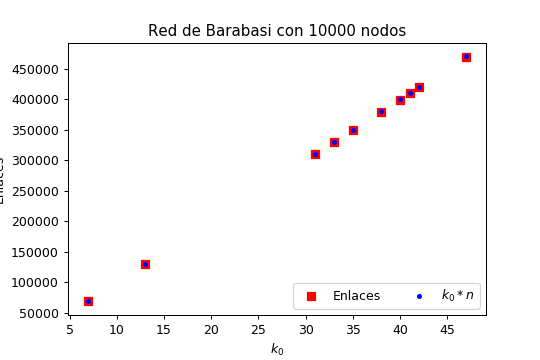

In [64]:
import matplotlib.pyplot as plt #esto se va cuando corramos todo

fig, ax = plt.subplots()
plt.xlabel('$k_0$')
plt.ylabel('Enlaces')
plt.title(f'Red de Barabasi con {n} nodos')

for key in m_dict.keys():
    
    scatter1 = ax.scatter(key, m_dict[key][0], c = 'r', alpha = 1, marker = 's')
    scatter2 = ax.scatter(key, key * n, c = 'b', alpha = 1, marker = '.')

ax.legend((scatter1, scatter2),
           ('Enlaces', '$k_0 * n$'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=10)

plt.show()   

In [ ]:
"Creo funcion que acepte n y m como parametros para realizar una Red Barabasi"
def Red_barabasi(n, m):
    k_0 = int(m / n)
    red = barabasi(k_0, n)
    return red

## d)
Calcule y grafique la distribución de grado para los 3 tipos de redes, para 4 casos donde m y n sean similares a aquellos de las redes del ejercicio 1). 
¿Qué tipo de red da una distribución más parecida a las de los datos? ¿Es posible extraer una conclusión general
sobre el mecanismo de generación de estas redes?

# Ejercicio 3
Construímos una red de tipo Barabasi con $n = 10000$ y $k_0 = 7$. Tomamos los 2 nodos
agregados en los pasos 5 y 95 para analiazar el grado de estos nodos en función
de los pasos siguientes. 

In [7]:
"Esta funcion es la misma que el 2C, pero ahora guarda la informacion de los nodos agregados en el paso 5 y el paso 95"

def barabasi_mod(m, final_nodes):
    #m es el grado de los nodos iniciales y a la vez la cantidad de enlaces que agrego por iteracion
    
    node_5 = []
    node_95 = []
    new_node = m + 1 
        
    G = nx.complete_graph(m)
    G_dict = {key: m-1 for key in range(m)}
    
    for step in range(final_nodes - m):
        nodes_to_add = add_edges_mod(G_dict, m)      
        G.add_node(new_node)
        G_dict[new_node] = m
        
         
        for node in nodes_to_add:
            G.add_edge(new_node, node)
            G_dict[node] += 1
        
                
        if G_dict.get(m + 5):
            degree_5 = G_dict[m + 5]
            node_5.append(degree_5)
        
            
        if G_dict.get(m + 95):
            degree_95 = G_dict[m + 95]
            node_95.append(degree_95)
        
        new_node += 1
        
    return G,node_5, node_95


        
def add_edges_mod(G_dict, m):
    nodes_probs = []
    nodes = list(G_dict.keys())
    total_degree = sum(G_dict.values())
    
    for node in nodes:
        node_degr = G_dict[node]
        node_prob = node_degr / total_degree
        nodes_probs.append(node_prob)
        
    random_nodes = np.random.choice(nodes, size = m, p = nodes_probs)
    
         
    return random_nodes

In [13]:
n_3 = 10000
k_0_3 = 7
Network_3, grado_5, grado_95 = barabasi_mod(k_0_3,n_3)

Graficamos el grado de los nodos elegidos en escala logarítmica en ambos ejes. 

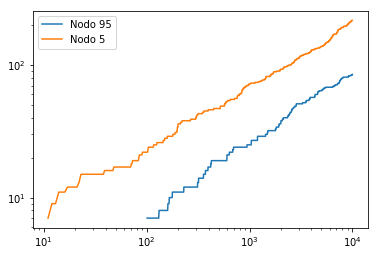

In [15]:
import matplotlib.pyplot as plt

plt.loglog(list(range(k_0_3 -1 + 95, 10000)),grado_95, label = "Nodo 95")
plt.loglog(list(range(k_0_3 -1 + 5 , 10000)), grado_5, label = "Nodo 5")
plt.legend()
plt.show()

# TODO 
¿Qué puede concluir de la
pendiente de las curvas? ¿Cuál es la diferencia entre un Hub (nodo de alto grado) y otro nodo de la
red?